In [1]:
from numpy import *
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations
# Pricing a Barrier option using Monte Carlo simulations
S0 = 100 # spot price of the underlying stock today
K = 105 # strike at expiry
mu = 0.05 # expected return
sigma = 0.2 # volatility
r = 0.05 # risk-free rate
T = 1.0 # years to expiry
Sb = 110 # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (log(S0/K) + (r+sigma**2/2) * (T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)

    c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.exp(-r*(T-t))
    p = norm.cdf(-d2)*K*np.exp(-r*(T-t)) - norm.cdf(-d1)*S0
    return c, p

In [4]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    path = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps #time increment
    path[0] = [S0] * numPaths #price of asset initial
   
    for n_p in range(numPaths): # path generation
        for n_s in range(numSteps):
            path[n_s + 1, n_p] = path[n_s, n_p]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*np.random.normal(0,1))
    
    # call and put payoff for each path
    callpayoff = np.maximum(path[numSteps] - K, 0)
    putpayoff = np.maximum(K - path[numSteps], 0)

    #discounting
    c  = np.mean(callpayoff) * np.exp(-r * T)
    p = np.mean(putpayoff) * np.exp(-r * T)
    return c, p

In [5]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    path = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps #time increment
    path[0] = [S0] * numPaths #price of asset initial
   
    for n_p in range(numPaths): # path generation
        for n_s in range(numSteps):
            path[n_s + 1, n_p] = path[n_s, n_p]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*np.random.normal(0,1))
 
    # call and put payoff for each path
    callpayoff = np.maximum(path[numSteps] - K, 0)
    putpayoff = np.maximum(K - path[numSteps], 0)
    
    # payoff is zero after crossing barrier before expiry
    x = sum(path>=Sb,axis=0)
    for n_p in range(numPaths):
        if x[n_p] == 0:
            callpayoff[n_p] = 0
            putpayoff[n_p] = 0 
    #discounting
    c  = np.mean(callpayoff) * np.exp(-r * T)
    p = np.mean(putpayoff) * np.exp(-r * T)
    return c, p

In [45]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations
numSteps = 252;
numPaths = 1000000;

In [44]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price(S0, K, T, r, sigma)

In [46]:
# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = \
MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

In [47]:
# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

In [48]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

In [49]:
# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

In [50]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step))
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step))
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step))
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step))
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.040867806147878
One-step MC price of an European put option is 7.869048116650034
Multi-step MC price of an European call option is 8.08429152709167
Multi-step MC price of an European put option is 7.855985423699266
One-step MC price of an Barrier call option is 7.809850616457772
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.040539985359992
Multi-step MC price of an Barrier put option is 2.00768919370535


In [ ]:
# Plot results

In [23]:
def sim_MC_path_plot(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
   
    path = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps #time increment
    path[0] = [S0] * numPaths #price of asset initial
   
    for n_p in range(numPaths): # path generation
        for n_s in range(numSteps):
            path[n_s + 1, n_p] = path[n_s, n_p]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*np.random.normal(0,1))
    
    plt.figure(figsize=(15,8))
    [plt.plot(path[:,p], color = (np.random.random(), np.random.random(), np.random.random())) for p in range(numPaths)]
    plt.title('Monte Carlo Simulated Asset Pricing')
    plt.xlabel('Time steps')
    plt.ylabel('Price')
    
    return path 

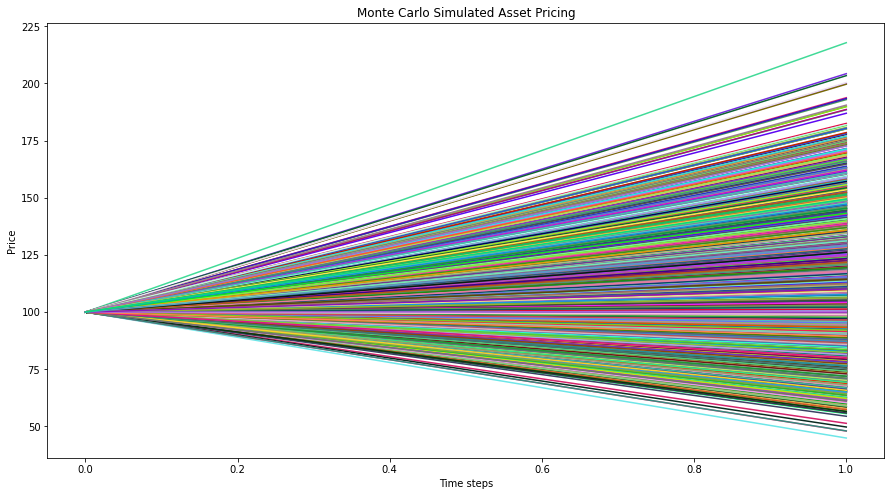

In [24]:
path = sim_MC_path_plot(S0, Sb, K, T, r, mu, sigma, 1, 10000)

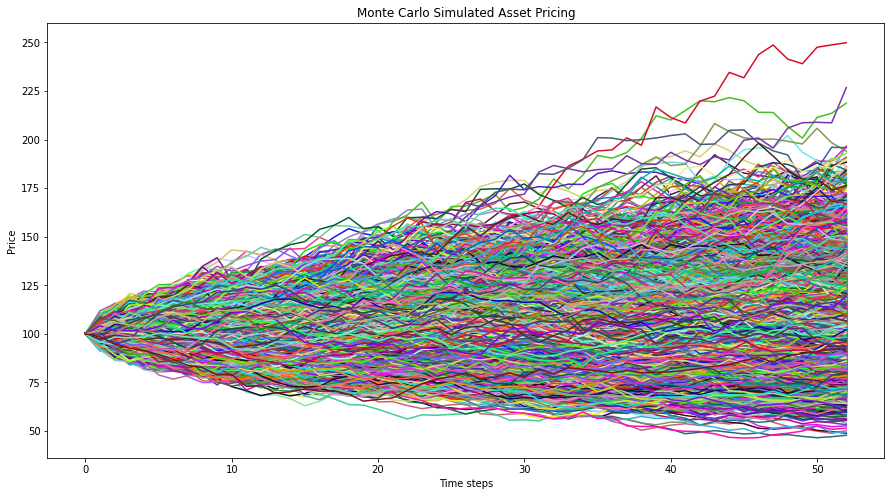

In [25]:
path = sim_MC_path_plot(S0, Sb, K, T, r, mu, sigma, 52, 10000)

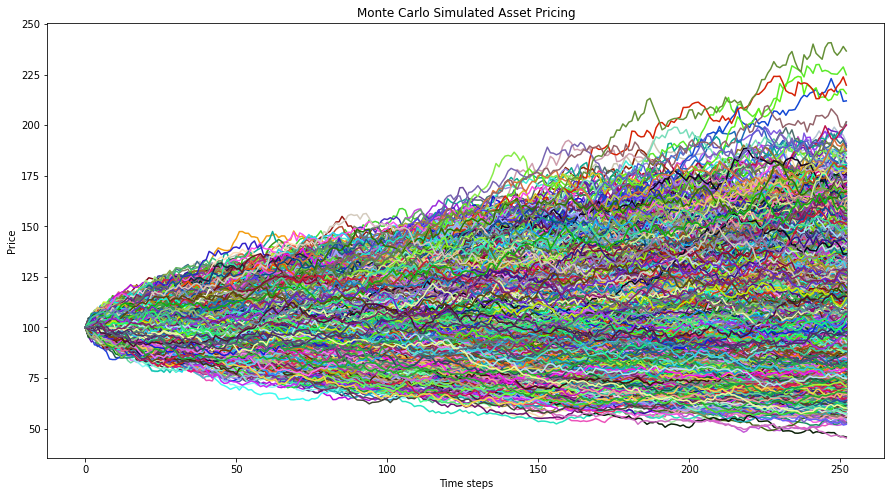

In [26]:
path = sim_MC_path_plot(S0, Sb, K, T, r, mu, sigma, 252, 10000)

In [27]:
# Compute prices of Barrier options with volatility decreased by 10%

#1_step
callMC_Barrier_Knockin_Price_1_step , putMC_Barrier_Knockin_Price_1_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)
print('one-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('one-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))

#Multi_step
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 252, numPaths)
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))  

one-step MC price of an Barrier call option is 7.004146815618034
one-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.2214076569146055
Multi-step MC price of an Barrier put option is 1.5614499321238053


In [28]:
# Compute prices of Barrier options with volatility increased by 10%

#1_step
callMC_Barrier_Knockin_Price_1_step , putMC_Barrier_Knockin_Price_1_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))  

#Multi_step
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 252, numPaths)
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))  


One-step MC price of an Barrier call option is 8.629278494526154
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.795764727042066
Multi-step MC price of an Barrier put option is 2.495285315488152
